# There are two types of Imputation 

* # 1 Univariate
* # 2 Multivariate

# Univariate

### There are two types of Univariate
* ### 1 Numerical


* ### 2 Categorical

### Numerical Techniques
* ### Mean or Median Value
* ### Arbitary Value
* ### End of Distributions Value
* ### Random Value
* ### Missing Indicator
* ### Automatic Selection Parameter

### Categorical Techniques
* ### Mode 
* ### Missing word

# Multivariate

### There are two class In Multivariate
* ### KNN Imputer
* ### Iterative Imputer

# -------------------------------------------------------------------------------------------------

# Univariate

## One type of imputation algorithm is univariate, which imputes values with the help of Mean , Median ,Mode using single (own) columns value

# Univariate on Mean / Median Imputation
### Only used when Missing values are 5%
### Only used When Missing Values are In Random Order

# Advantage
* ### Simple Easy and also handle value on production

# Disdvantage
* ### Change Distribution
* ### Outliers
* ### Co - Relations changes 

### When the Data are Normal Dstribution than used Mean
### When the Data are Right Dstribution than used Median

# Example

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [10]:
df = pd.read_csv("./titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


# Check Missing Data

In [12]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

# Check Percentage

In [14]:
df.isnull().mean() * 100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [15]:
x = df.drop(columns=["Survived"])
y = df.Survived

In [71]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [17]:
xtrain.shape , xtest.shape

((712, 3), (179, 3))

In [19]:
xtrain.isnull().mean() * 100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

# Mean / Median xtrain

In [21]:
mean_age = xtrain.Age.mean()
mean_fare = xtrain.Fare.mean()

median_age = xtrain.Age.median()
median_fare = xtrain.Fare.median()

# Fill value using fillna

In [23]:
xtrain["Age_mean"] = xtrain.Age.fillna(mean_age)
xtrain["Age_median"] = xtrain.Age.fillna(median_age)

xtrain["Fare_mean"] = xtrain.Fare.fillna(mean_fare)
xtrain["Fare_median"] = xtrain.Fare.fillna(median_fare)

In [24]:
xtrain.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
115,21.0,7.9250,0,21.000000,21.00,7.925000,7.9250
378,20.0,NaN,0,20.000000,20.00,32.617597,14.4583
375,NaN,82.1708,1,29.785904,28.75,82.170800,82.1708
149,42.0,13.0000,0,42.000000,42.00,13.000000,13.0000
445,4.0,81.8583,2,4.000000,4.00,81.858300,81.8583


# Now Check Variance Changes

In [30]:
print("Orignal Age Variance\t",xtrain.Age.var())
print("Age Median Variance\t",xtrain.Age_median.var())
print("Age Mean Variance\t",xtrain.Age_mean.var())
print()
print("Orignal Fare Variance\t",xtrain.Fare.var())
print("Fare Median Variance\t",xtrain.Fare_median.var())
print("Fare Mean Variance\t",xtrain.Fare_mean.var())

Orignal Age Variance	 204.3495133904614
Age Median Variance	 161.9895663346054
Age Mean Variance	 161.81262452718673

Orignal Fare Variance	 2448.197913706318
Fare Median Variance	 2340.0910219753637
Fare Mean Variance	 2324.2385256705547


# Plot Graph Age

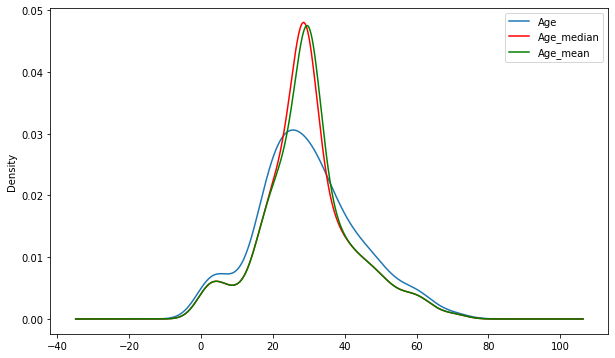

In [50]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xtrain.Age.plot(kind="kde",ax=ax)
xtrain.Age_median.plot(kind="kde",ax=ax,color="red")
xtrain.Age_mean.plot(kind="kde",ax=ax,color="green")

# legend
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

# Plot Graph Fare

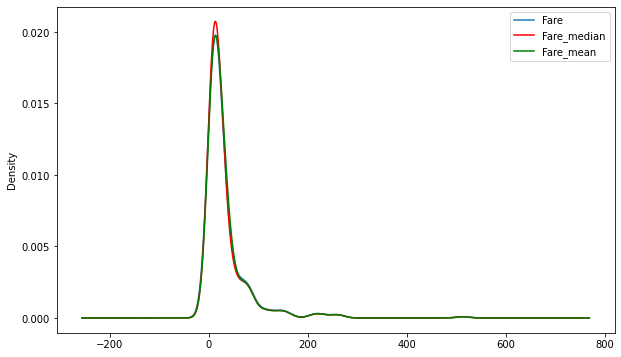

In [51]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xtrain.Fare.plot(kind="kde",ax=ax)
xtrain.Fare_median.plot(kind="kde",ax=ax,color="red")
xtrain.Fare_mean.plot(kind="kde",ax=ax,color="green")

# legend
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

## Here Fare Graph are Good But Maximum Changes in Age Graph

# Check Co-Variance

In [52]:
xtrain.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


# Check Co-Relation

In [53]:
xtrain.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
Fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
Fare_median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


# Check Outliers with box-plot

<AxesSubplot:>

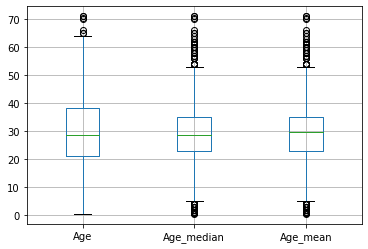

In [55]:
xtrain[["Age","Age_median","Age_mean"]].boxplot()

<AxesSubplot:>

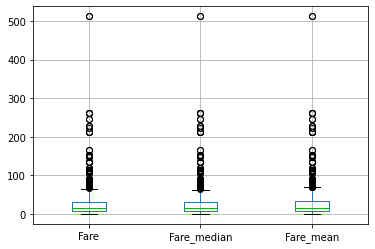

In [56]:
xtrain[["Fare","Fare_median","Fare_mean"]].boxplot()

# Fill value with Sklearn with SimpleImputer

### SimpleImputer(*,
    missing_values=nan, 
    strategy='mean', 
    fill_value=None, 
    verbose='deprecated', 
    copy=True, 
    add_indicator=False
# )

### missing_valuesint, float, str, np.nan, None or pandas.NA, default=np.nan

### strategy str, default=’mean’

### The imputation strategy.

    If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.

    If “median”, then replace missing values using the median along each column. Can only be used with numeric data.

    If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.

    If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.

### fill_valuestr or numerical value, default=None

In [57]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [58]:
imp1 = SimpleImputer(strategy="median")
imp2 = SimpleImputer(strategy="mean")

In [60]:
trf = ColumnTransformer(
[
    ("imp1",imp1,["Age"]),
    ("imp2",imp2,["Fare"])
],remainder="passthrough"

)

In [61]:
trf.fit(xtrain)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imp1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imp2', SimpleImputer(), ['Fare'])])

In [66]:
trf.named_transformers_.imp1.statistics_

array([28.75])

In [67]:
trf.named_transformers_.imp2.statistics_

array([32.61759689])

In [68]:
xtrain =  trf.transform(xtrain)
xtest =  trf.transform(xtest)

In [70]:
xtrain

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])



# Multivariate

## One type of imputation algorithm is Multivariate, which imputes values with using Multiple columns values

